In [3]:
from google.colab import files
uploaded = files.upload()

Saving Wakatime_X_Train.csv to Wakatime_X_Train.csv
Saving Wakatime_Y_Train.csv to Wakatime_Y_Train.csv


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dfx=pd.read_csv("Wakatime_X_Train.csv")
dfy=pd.read_csv("Wakatime_Y_Train.csv")
dfx.head(n=5)

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [ ]:
dfy.head(n=5)

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


mean: -0.03779466168006855
std: 0.9920801322508517


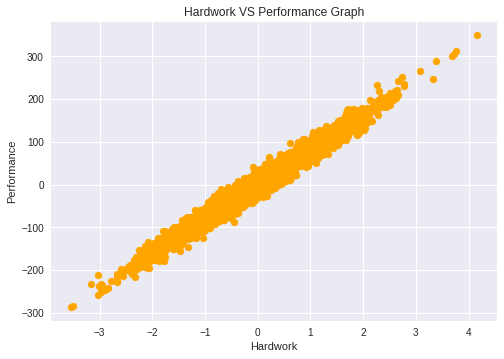

In [15]:
X=dfx.values
Y=dfy.values
 

#normalisation of data (X values)
u=X.mean()
std=X.std()
print("mean:",u)
print("std:",std)
X=(X-u)/std  #normalising

#visualising the data
plt.style.use('seaborn')
plt.scatter(X,Y,color='orange')
plt.title("Hardwork VS Performance Graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()




In [18]:
#Linear Regression
def hypothesis(x,theta):      #step1
  y_=theta[0]+theta[1]*x
  return y_

def gradient(X,Y,theta):     #step2
  m=X.shape[0]
  grad=np.zeros((2,))
  for i in range(m):
    x=X[i]
    y_=hypothesis(x,theta)
    y=Y[i]
    grad[0]+=(y_ - y)
    grad[1]+=(y_ -y)*x
  return grad/m

def error(X,Y,theta):
  m=X.shape[0]
  total_error=0.0
  for i in range(m):
    y_=hypothesis(X[i],theta)
    total_error+=(y_ -Y[i])**2      #mean square error
  return total_error/m  

def gradientdescent(X,Y,max_steps=100,learning_rate=0.1):    #step3
  theta=np.zeros((2,))   #theta is initialised as a numpy array of zeroes
  error_list=[]  
  for i in range(max_steps):
    grad=gradient(X,Y,theta)  #input
    e=error(X,Y,theta)
    error_list.append(e)
    theta[0]=theta[0]-learning_rate*grad[0]    
    theta[1]=theta[1]-learning_rate*grad[1]
  return theta,error_list





[]

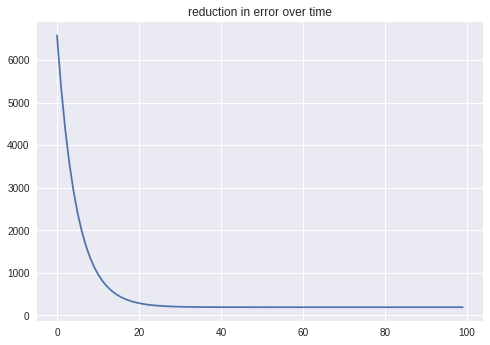

In [20]:
theta,error_list=gradientdescent(X,Y)
plt.plot(error_list)
plt.title("reduction in error over time")
plt.plot()

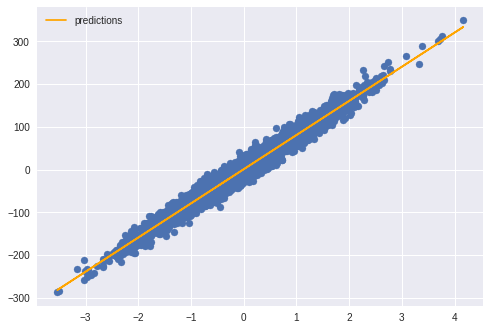

In [22]:
y_=hypothesis(X,theta)
plt.scatter(X,Y)
plt.plot(X,y_,color="orange",label="predictions")
plt.legend()
plt.show()


In [23]:
from google.colab import files
uploaded=files.upload()


Saving wakatime_X_Test.csv to wakatime_X_Test.csv


In [25]:
X_test=pd.read_csv("wakatime_X_Test.csv").values
Y_test=hypothesis(X_test,theta)


In [27]:
df=pd.DataFrame(data=Y_test,columns=["y"])
df.to_csv("wakatime_y_predictions.csv",index=False)

In [28]:
#Computing scores
def r2_score(Y,Y_):
  num=np.sum((Y-Y_)**2)
  denom=np.sum((Y-Y.mean())**2)
  score=1-num/denom
  return score*100
  


In [29]:
r2_score(Y,y_)

97.09612226971643